Further reading:
- [Minimum steps for the knight](https://www.geeksforgeeks.org/minimum-steps-reach-target-knight/).

In [1]:
import numpy as np
from itertools import product
from pieces import Knight
from utils import get_coordinates, plot_heatmap

In [2]:
NROWS, NCOLS = 8, 8
TWEAKS = {'cmap': 'Blues', 'figsize': (8, 7), 'vmin': 0, 'vmax': 6}

In [3]:
def can_capture(startRow, startCol, endRow, endCol):
    global NROWS, NCOLS
    board_src = Knight.get_possible_moves(startRow, startCol, NROWS, NCOLS)
    
    board_tgt = np.zeros(shape=(NROWS, NCOLS))
    board_tgt[endRow, endCol] = 1
    board_tgt = np.flip(board_tgt, 0)
    
    return np.multiply(board_src, board_tgt).any()


In [4]:
memory = {}

def minimum_moves(startRow, startCol, endRow, endCol):
    global memory

    if not (startRow, startCol, endRow, endCol) in memory.keys():
        if (startRow, startCol) == (endRow, endCol):
            memory[(startRow, startCol, endRow, endCol)] = 0
        else:
            plies = 1
            cur_sqs = [(startRow, startCol)]

            while True:
                captures = [can_capture(*cur_sq, endRow, endCol) for cur_sq in cur_sqs]
                if any(captures):
                    memory[(startRow, startCol, endRow, endCol)] = plies
                    break
                
                next_sqs = []
                for sq in cur_sqs:
                    rows, cols = np.nonzero(np.flip(Knight.get_possible_moves(*sq, NROWS, NCOLS), 0))
                    next_sqs = next_sqs + list(zip(rows, cols))

                cur_sqs = list(set(next_sqs))
                plies = plies + 1
            
    return memory.get((startRow, startCol, endRow, endCol), np.inf)


In [5]:
def minimum_board(startRow, startCol):
    global NROWS, NCOLS
    
    board = np.zeros(shape=(NROWS, NCOLS))
    for row, col in product(range(NROWS), range(NCOLS)):
        board[row, col] = minimum_moves(startRow, startCol, row, col)

    return np.flip(board, 0)

**START**: a1

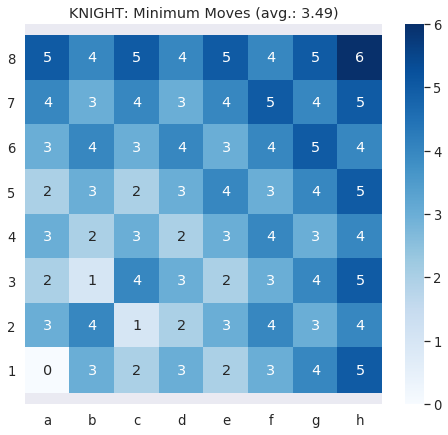

In [6]:
heatmap_a1 = minimum_board(*get_coordinates('a1'))
avg_a1 = heatmap_a1.sum()/((NROWS * NCOLS) - 1)

plot_heatmap(heatmap_a1, title='KNIGHT: Minimum Moves (avg.: {:.2f})'.format(avg_a1), **TWEAKS)

**START**: d4

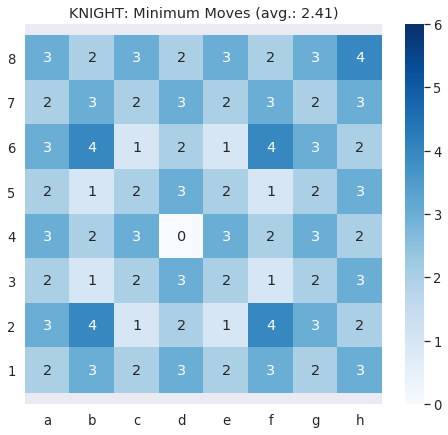

In [7]:
heatmap_d4 = minimum_board(*get_coordinates('d4'))
avg_d4 = heatmap_d4.sum()/((NROWS * NCOLS) - 1)

plot_heatmap(heatmap_d4, title='KNIGHT: Minimum Moves (avg.: {:.2f})'.format(avg_d4), **TWEAKS)

**START**: g7

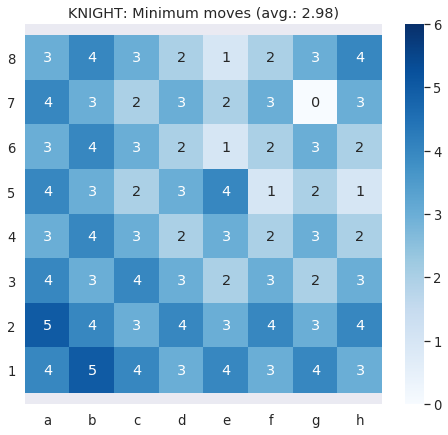

In [8]:
heatmap_g7 = minimum_board(*get_coordinates('g7'))
avg_g7 = heatmap_g7.sum()/ ((NROWS * NCOLS) - 1)

plot_heatmap(heatmap_g7, title='KNIGHT: Minimum moves (avg.: {:.2f})'.format(avg_g7), **TWEAKS)

**START**: f6

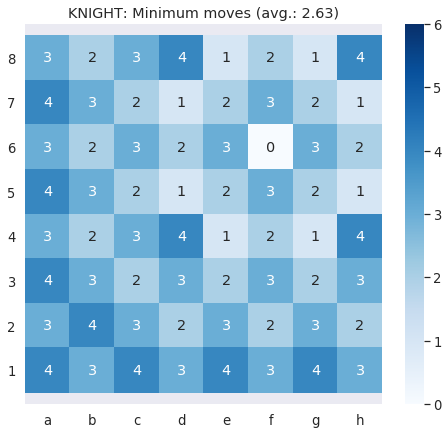

In [9]:
heatmap_f6 = minimum_board(*get_coordinates('f6'))
avg_f6 = heatmap_f6.sum()/ ((NROWS * NCOLS) - 1)

plot_heatmap(heatmap_f6, title='KNIGHT: Minimum moves (avg.: {:.2f})'.format(avg_f6), **TWEAKS)